Basic chatbot with Langgraph (Graph API)

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):

    messages:Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [4]:
graph_builder

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model_name="sonar-pro",  # Using Perplexity's 7B model
    openai_api_key=os.environ["PERPLEXITY_API_KEY"],
    base_url="https://api.perplexity.ai"
)

response = llm.invoke("Who is Godwin")
print(response.content)

Godwin most commonly refers to Godwin, Earl of Wessex (died 1053), a powerful Anglo-Saxon nobleman and political figure in 11th-century England. He rose from relative obscurity to become Earl of Wessex under King Cnut around 1018 and became recognized as a "kingmaker," effectively ruling England in all but name during his lifetime [1][2][4].

Godwin's influence was rooted in his strategic alliances—including marriage into a prominent Danish family—and his skillful navigation of shifting royal politics. He opposed growing Norman influence at court and was temporarily exiled in 1051 after defying King Edward the Confessor, but he soon returned to power with military support [2][3]. Upon his death, his son Harold Godwinson succeeded him and later became King of England in 1066, marking the height of the Godwin family’s power just before the Norman Conquest [1][4].

If your query refers to a different "Godwin" (such as a modern figure or a character in literature), please provide more cont

In [12]:
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000013F97B20620>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000013F9784DF70>, root_client=<openai.OpenAI object at 0x0000013F9763D3D0>, root_async_client=<openai.AsyncOpenAI object at 0x0000013F9797DC40>, model_name='sonar-pro', model_kwargs={}, openai_api_key=SecretStr('**********'), openai_api_base='https://api.perplexity.ai')

In [58]:
# #Node Functionality
from langchain_core.messages import AIMessage, HumanMessage

def chatbot(state: State):
    message = state["messages"]
    if isinstance(message, list):
        message = message[-1]
    
    response = llm.invoke(str(message))
    return {"messages": [HumanMessage(content=str(message)), AIMessage(content=response.content)]}


In [59]:
graph_builder = StateGraph(State)
graph_builder.add_node("llmchatbot",chatbot)

graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

graph = graph_builder.compile()

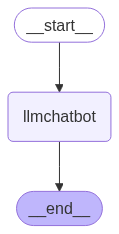

In [60]:
from IPython.display import Image,display


try:
    display(Image(graph.get_graph().draw_mermaid_png()))

except Exception:
    pass

In [61]:
response = graph.invoke({
    "messages": [HumanMessage(content="how are you")]
})

In [56]:
response["messages"][-1].content

'“How are you?” is a common greeting in English; standard responses include “Good, thanks. And you?” or “I’m well, thank you” in formal situations, and more creative or honest answers are used with friends or colleagues depending on context [1][3].\n\nIn a formal or professional setting, polite replies are preferred, such as:\n- “Very well, thanks for asking. And you?”  \n- “I’m doing well, thank you.” [1]\n\nWith friends, family, or in casual situations, responses can be more personal or playful:\n- “I’m okay.”\n- “Great!”\n- “Excited—something good is coming up.”\n- “I’ve been better.”\n- “Stressed out, but hanging in there.” [3]\n\nCreative and humorous responses, often used to lighten the mood among coworkers or friends, include:\n- “Living the dream—please don’t wake me up.”\n- “Medium well.”\n- “Better than I deserve.”\n- “Mentally at the beach.” [1]\n\nChoosing how to answer depends on your relationship with the person and the setting. Polite and brief responses are safest with 

In [62]:
for event in graph.stream({"messages":"How are you"}):
    for value in event.values():
        print(value)


{'messages': [HumanMessage(content="content='How are you' additional_kwargs={} response_metadata={} id='467f34b6-2128-48be-9097-87cb81880d1d'", additional_kwargs={}, response_metadata={}, id='49c31791-fd52-4429-adf1-72a5bfb93fda'), AIMessage(content='Common replies to "How are you?" include "Good," "Well," "Great," "Fine," and "All right," all of which are polite and widely accepted in both casual and professional contexts [5]. In more formal settings, you might answer, "Very well, thanks for asking. And you?" [3].\n\nIf you want a humorous or creative response, options include:\n- "Not bad for a human."\n- "Living the dream. Please don’t wake me up."\n- "If I was any better, vitamins would be taking me."\n- "Surviving on coffee and sarcasm." [1][3]\n\nThe type of response can be tailored to your mood, setting, and relationship with the person asking. For professional interactions, neutral or positive answers are best, while casual or funny replies can help create a lighthearted atmosp